# Table of Content

1. Introduction

2. Statement of Problem

    1. What Factors Affect a Loan's Outcome Status?
    2. What Factors Affects the Borrower’s APR or Interest Rate?
    3. Are there Differences between Loans depending on how large the Original Loan Amount was?

3. Library Import and Data Loading
4. Data Overview
5. Basic Data Cleaning
6. Data Exploration
7. Univariate Exploration
8. Bivariate Exploration
9. Multivariate Exploration
10. Summary and Conclusion

# Introduction

In This project we work with Prosper Loan Dataset, which includes the loan data for a large number of institute customers, trying to explain the behaviour of particular parameters and then to establish relationships between different parameters. Most of our work is done through the correct use of use of visualization in python. Plots meant to be as clear as possible so that user can easily relate to them.

# Prosper Loan Dataset

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This data dictionary explains the variables in the data set. We will not explore all of the variables in the dataset, but rather focus on about 10-15 of them.

# Main Focus

**What is the Structure of your Dataset?**

There are total of 113937 loans entries saved in the dataset and 81 attributes. Each loan contain information on the borrowered's background information and details regarding the loans.

**What is/are the Main Feature(s) of Interest in your Dataset?**

The Loan Status will be analysed with many Factors such as Monthly Payment, Investors, Income.

    Answer the Question: Who is currently in Debt, Relationship of Borrower APR and Loan Status, Occupation, Credits.
    Answer the Question: What Job Cause Risky and Bad Credit?

**What Features in the Dataset do you think will Support your Investigation into your Feature(s) of Interest?**

Occupation, Credit Score, Loan Status will find What is the characteristic of a Good/Bad Customers.

# Preliminary Wrangling

**This Project is Divided into Two Major Parts ->**

In the First Part, we will conduct an Exploratory Data Analysis on a dataset of our choosing. We will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part is structured, going from simple univariate relationships up through multivariate relationships.

In the second part, We will take our Main Findings from our exploration and convey them to others through an explanatory analysis.

To this end, We will Create a Slide Deck that Leverages Polished, create a slide deck that leverages polished, explanatory visualizations to communicate our results.

In [2]:
# Import Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from matplotlib.pyplot import xticks

%matplotlib inline

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Gathering

Original dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [3]:
# Load the DataSet into a Pandas DataFrame
loan_df = pd.read_csv('prosperLoanData.csv')

In [4]:
# Display Information About the Original DataSet
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

Since our main goal here is EDA, I merged assessing and cleaning steps into one to make it concise and I left the following code here by choice for future references and more understanding of the original and cleaned datasets.

In [5]:
loan_df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore      ...        LP_ServiceFees  \
count             84853.000000  84853.000000      ...         113937.000000   
mean                  4.072243      5.950067      ...            -54.725641   
std                   1.673227      2.376501      ...             60.675425   
min                   1.000000      1.000000      ...           -664.870000   
25%                   3.000000      4.000000      ...            -73.180000   
50%                   4.000000      6.000000      ...            -34.440000   
75%                   5.000000      8.000000      ...            -13.920000   
max                   7.000000     11.000000      ...             32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     

In [6]:
loan_df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [7]:
loan_df.CreditGrade.unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [8]:
loan_df.Term.unique()

array([36, 60, 12])

In [9]:
loan_df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [10]:
loan_df.IsBorrowerHomeowner.unique()

array([ True, False], dtype=bool)

In [11]:
loan_df.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [12]:
loan_df.IncomeVerifiable.unique()

array([ True, False], dtype=bool)

# Data Assessing and Cleaning

1. Choose Subset of Features Important.
2. Drop Duplicated Rows based on Listing Number.
3. Convert Datatypes of Total Trades and Total Inquiries to int, Listing Creation Date to datetime.
4. Removed Rows without Prosper Rating.
5. Fill in Missing Values of Occupation and Debt To Income Ratio.
6. Change Listing Category Numeric to string.

**Dataset Overview(Programmatic)**

In this part we will try using different pandas functions to assess and gain insight into data. Some of what we are looking are as folows:

* Are there any Null Data in the Dataset
* What are the Unique Values of Important Categorical Columns
* Showing the Statistical Description of Numerical Columns

At the end of this step, we will identify what major data cleaning activities must be done.

In [13]:
loan_df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380    ...            -133.18                0.0   
1        0.0920       0.0820    ...               0.00                0.0   
2        0.2750       0.2400    ...             -24.20                0.0   
3        0.0974       0.0874    ...            -108.01                0.0   
4        0.2085       0.1985    ...             -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

**Define:**

1. Change EmploymentStatus from NaN to Not Available.
2. Change IncomeRange from Not Employed to $0.
3. BorrowerAPR contains 25 NaN values which limits plotting capabilities, should be dropped.

**Code:**

In [19]:
loan_df.EmploymentStatus.fillna(value = 'Not available', inplace = True)

In [20]:
loan_df.IncomeRange.replace('Not employed', '$0', inplace = True)

In [21]:
loan_df.dropna(subset=['BorrowerAPR'], inplace=True)

**Test:**

In [22]:
loan_df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'Not employed', 'Part-time', 'Retired'], dtype=object)

In [23]:
loan_df.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', '$0'], dtype=object)

In [24]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113912 non-null object
ListingNumber                          113912 non-null int64
ListingCreationDate                    113912 non-null object
CreditGrade                            28928 non-null object
Term                                   113912 non-null int64
LoanStatus                             113912 non-null object
ClosedDate                             55064 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113912 non-null float64
LenderYield                            113912 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

**Assessment Results**

While there are many data quality and tidiness issues can be seen in the data.

We will focus on the columns that are more important to us for cleaning.

Note that this is a repetitive process. Should we find out that there is more cleaning to be done to get better results in the next phase of study, we will revisit this step.

Here are the major issue that may hinder our project and must be cleaned immediately.

# Data Exploration

**Part I: Univariate Exploration**

Data exploration starts with univariant exploration. We will focus on main variables and try to answer questions such as if they are uniformly distributed or are they skewed, are they unimodal or bimodal.

We will use visualisation methods as opposed to statistical descriptive methods and will focus mostly on LoanStatus, BorrowerAPR and LoanOriginalAmount variables.

**Note on Skeweness:** The best method to establish data skewness is to calculate one of many coefficients of skeneww, however, since we are focusing on data visualization ,we will plot and compare Mean and Median of the data to establish skeweness. For example, a mean larger than median means we are dealing with a positively skewed dataset.

**Note on Color Pallets:** where applicable, we will use the colorblind pallet from seaborn library to make it easier for colorblind users to read the plots

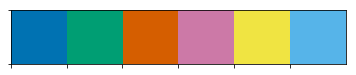

In [25]:
# To Make the Visulas Easier to Read for Color Blind Users, We will Set out Pallet to 'Colorblind'
sns.set_palette("colorblind")
sns.palplot(sns.color_palette())

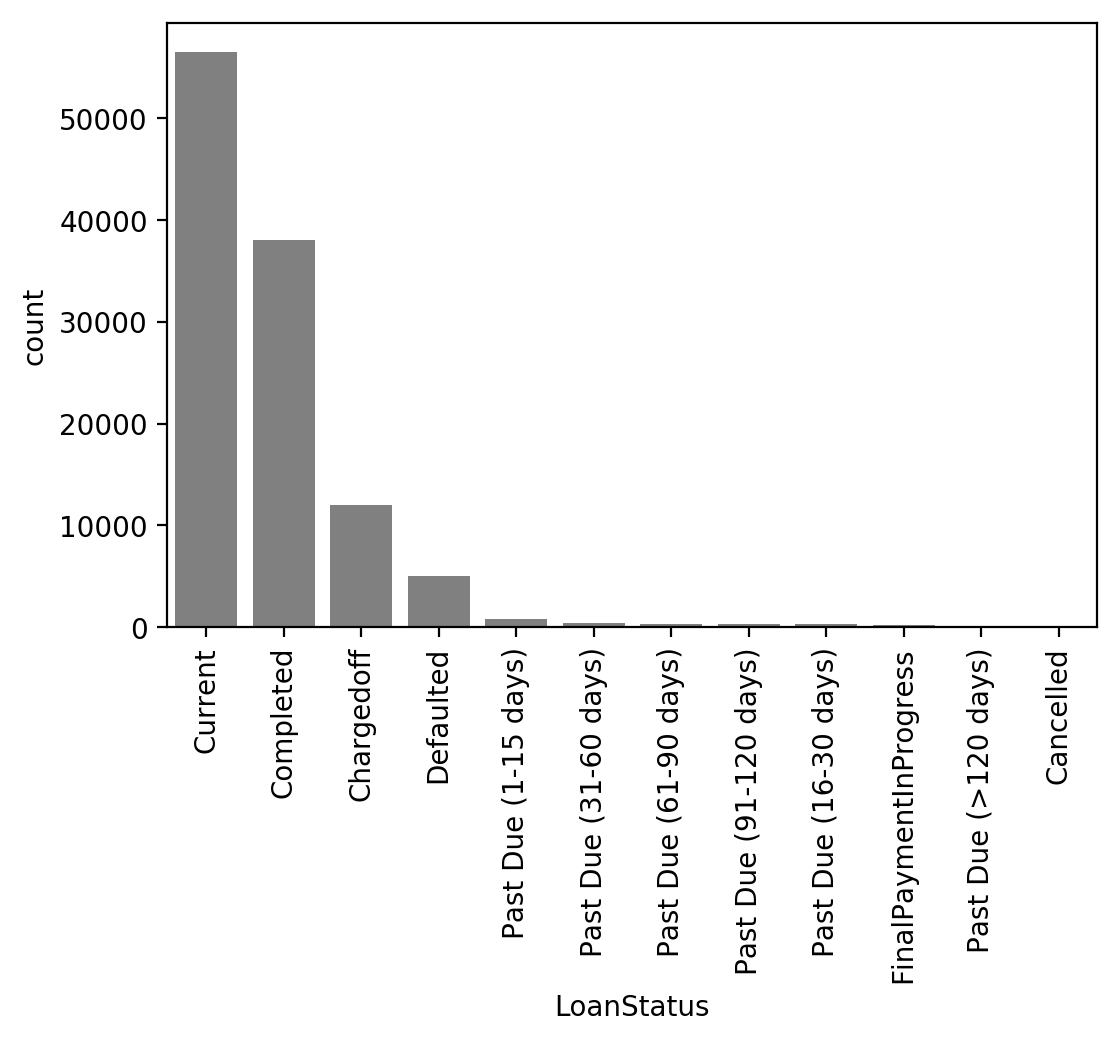

In [26]:
# univariate plot of LoanStatus as a Categorical data, sorted by the highest freqquency 
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=200)
sns.countplot(loan_df['LoanStatus'], order = loan_df.LoanStatus.value_counts().
              index ,color = '0.5' )
plt.xticks(rotation = 90);

**Loan Status Comments:**

Almost all the data can be placed in the first four categories (Current, Completed, Chargedoff, Defaulted).

Current category contains more loans than any others.

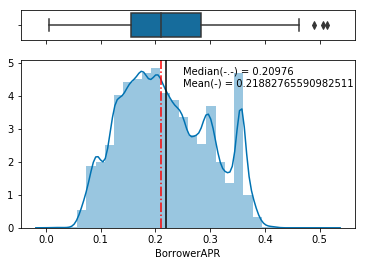

In [27]:
# Median and Mean comparison 
median_APR= loan_df.BorrowerAPR.median()
mean_APR= loan_df.BorrowerAPR.mean()

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(loan_df["BorrowerAPR"], ax=ax_box)
#sns.distplot(df_loan["BorrowerAPR"], ax=ax_hist)

sns.distplot(loan_df['BorrowerAPR'],bins=30,kde=True).annotate('''Median(-.-) = {}
Mean(-) = {}'''.format(median_APR, mean_APR), (0.25,4.3))
plt.axvline(x=median_APR, color='red', linestyle='-.')
plt.axvline(x=mean_APR, color='black');

# Remove x axis name for the boxplot
ax_box.set(xlabel='');

**Borrower Rate Distribution Comments:**

    1. All BorrowerAPR values larger than 0.45 can be considered as outliers, based on the Box plot.
    2. Mean and Median are very close to each other, Mean is slightly larger than Median.
    3. It is a slightly right skewed distribution with a spike around 0.35.

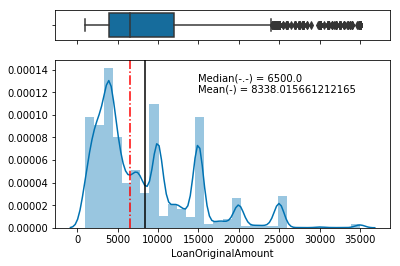

In [28]:
# univariate Histogram of LoanOriginalAmount 
# Median and Mean comparison 
median_LOA= loan_df.LoanOriginalAmount.median()
mean_LOA= loan_df.LoanOriginalAmount.mean()

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(loan_df["LoanOriginalAmount"], ax=ax_box)

sns.distplot(loan_df['LoanOriginalAmount'],bins=30,kde=True).annotate('''Median(-.-) = {}
Mean(-) = {}'''.format(median_LOA, mean_LOA), (15000,0.00012))
plt.axvline(x=median_LOA, color='red',linestyle='-.')
plt.axvline(x=mean_LOA, color='black');

# Remove x axis name for the boxplot
ax_box.set(xlabel='');

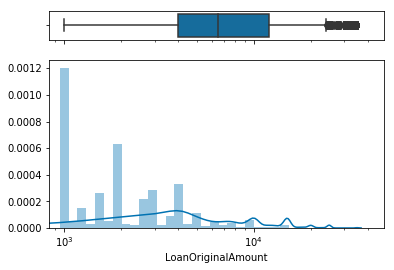

In [29]:
# univariate plot of LoanOriginalAmount 
# Logaritmic Scale 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
mybins=np.logspace(0, np.log(100), 100)
sns.boxplot(loan_df["LoanOriginalAmount"], ax=ax_box)
sns.distplot(loan_df["LoanOriginalAmount"], ax=ax_hist, bins=mybins)
mybins=np.logspace(0, np.log(100), 100)

# Logarithmic x axis scale
plt.xscale('log')

 
# Remove x axis name for the boxplot
ax_box.set(xlabel='');

**Loan Original Amount Distribution Plot:**

    1. All values larger than 25000 can be considered as outliers, based on the Box chart.
    2. Positivly skewed due to Mean > Median with highest frequencies between 1,000 to 10,000.
    3. Data is very spiky on logaritmic scale and doesnt conform to a Unimodal or even Bimodal distribution.

**Part II: Bivariate Exploration**

Above, We looked at the Univariate Distribution of Three Features in the Prosper Loan Dataset: Loan Status, Borrower APR and Loan Original Amount.

Here, we'll investigate relationships between pairs of these variables, particularly how each of them relate to the three above mentioned features.

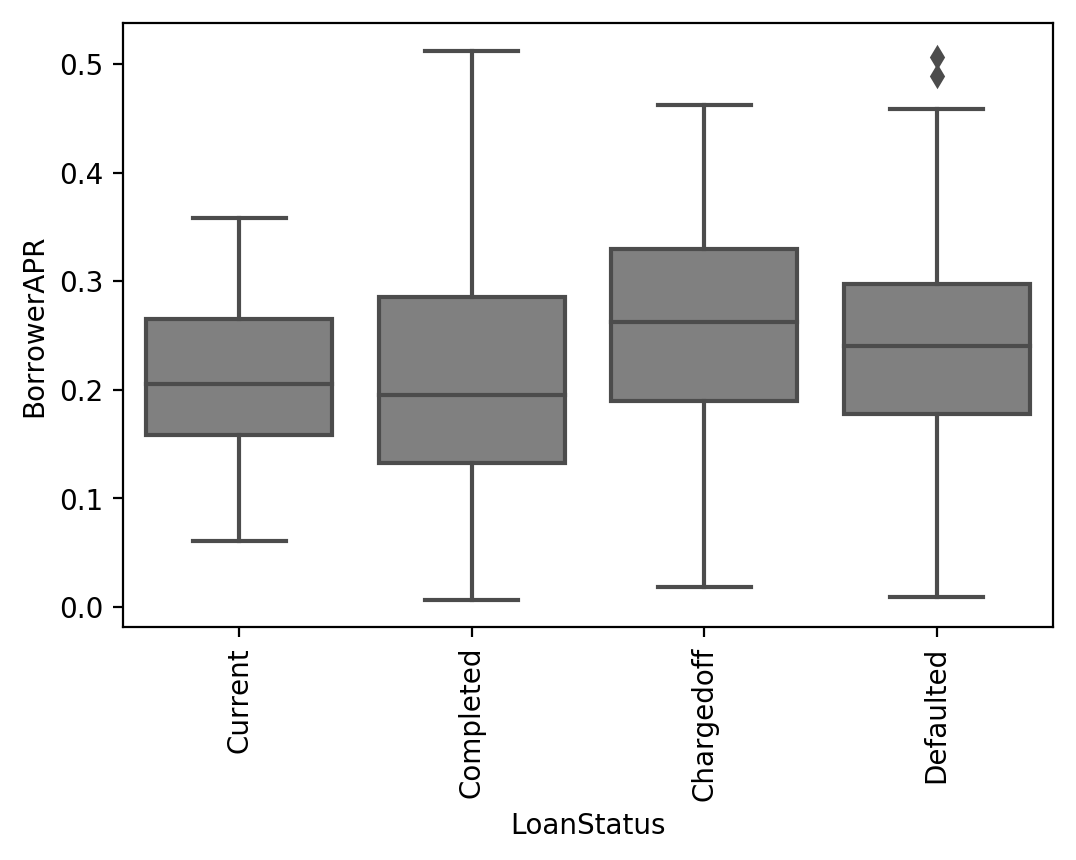

In [30]:
# Borrower APR Variation for each Loan Status Category, arranged by Maximum Frequency of Loan Status Categories
mask = loan_df['LoanStatus'].isin(['Completed','Current','Chargedoff','Defaulted'])
loan_df.loc[mask,('LoanStatus','BorrowerAPR')]
fig4,axes=plt.subplots(nrows=1,ncols=1,dpi=200)
sns.boxplot(data=loan_df.loc[mask,('LoanStatus','BorrowerAPR')], x='LoanStatus', y='BorrowerAPR', color='0.5', 
            order=loan_df.loc[mask,('LoanStatus','BorrowerAPR')].LoanStatus.value_counts().index)
plt.xticks(rotation=90);

**Borrower APR for Loan Status Categories Insights:**

    1. Considering the bar chart from univariate exploration of LoanStatus, we know that major LoanStatus categories are established to be Current, Completed, Chargedoff and Defaulted. We use the same order to focus on the characteristics of these major groups.
    2. Interestingly enough, mean values of BrrowerAPR for Current, Completed LoanStatus categories are significantly lower than Chargedoff and Defaulted categories.

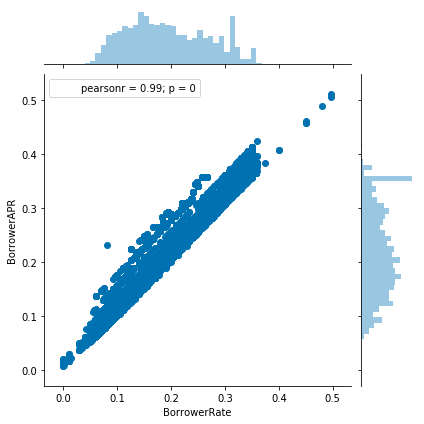

In [31]:
# Borrower APR Variation Versus Borrow Rate
sns.jointplot('BorrowerRate','BorrowerAPR',data=loan_df ).annotate(stats.pearsonr);

**Borrower APR Versus Borrower Rate Insight:**

    1. Borrower APR is related to Borrower rate. Pearson r of 0.99 is indicative of this fact.
    2. There is a strong positive relationship between the 2 variables, meaning an increase in one will result in an increase in the other one.

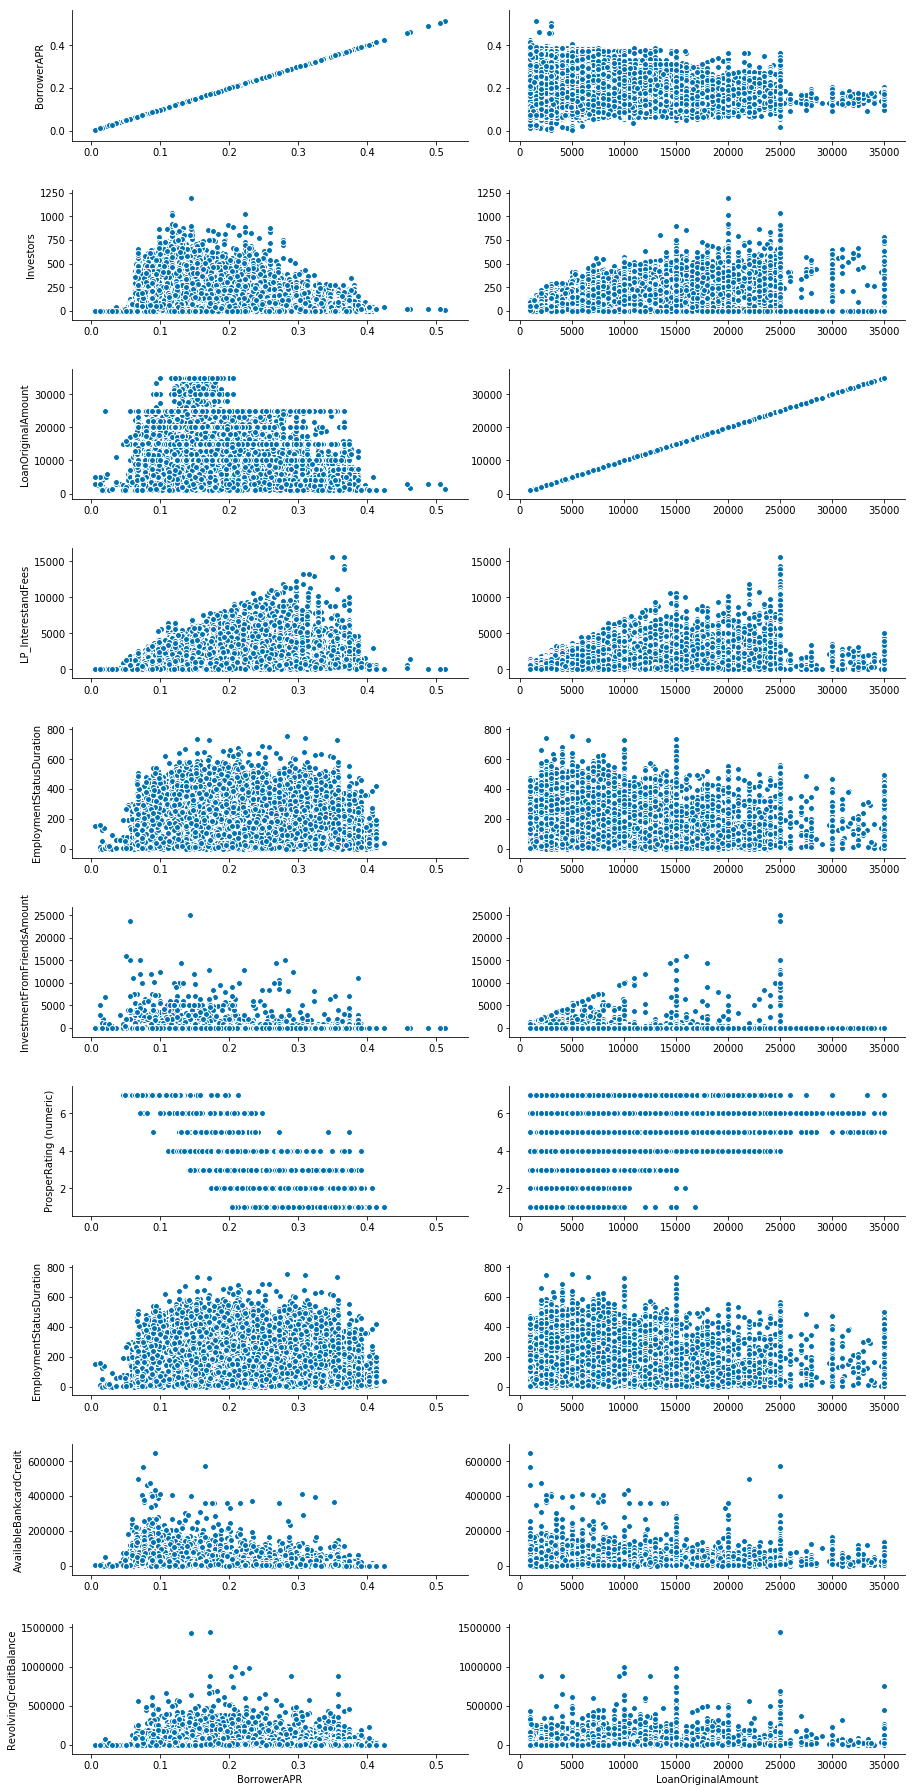

In [32]:
sns.pairplot(loan_df, x_vars = ['BorrowerAPR','LoanOriginalAmount'] , 
             y_vars = ['BorrowerAPR','Investors','LoanOriginalAmount','LP_InterestandFees',
                       'EmploymentStatusDuration','InvestmentFromFriendsAmount','ProsperRating (numeric)',
                       'EmploymentStatusDuration', 'AvailableBankcardCredit', 'RevolvingCreditBalance'],
           aspect = 2.5);

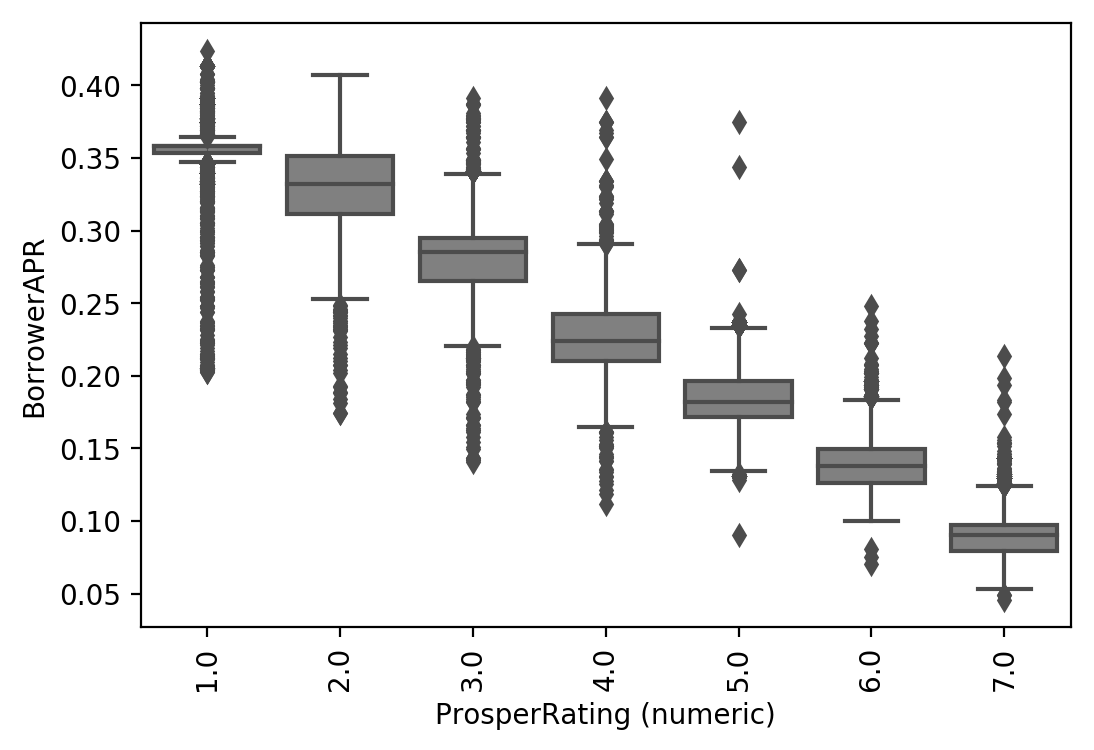

In [33]:
# Borrower APR Variation for each Prosper Rating (numeric) Category
fig6,axes=plt.subplots(nrows=1,ncols=1,dpi=200)

sns.boxplot(data=loan_df, x='ProsperRating (numeric)', y='BorrowerAPR', color='0.5')
plt.xticks(rotation=90);

**Borrower APR Versus Prosper Rating (numeric) Insight:**

    1. Borrower APR is related to Prosper Rating (numeric).
    2. There is a Negative Relationship between 2 Variables. It Means when the Prosper Rating (numeric) Variable Increases, the the Borrower APR Decreases.

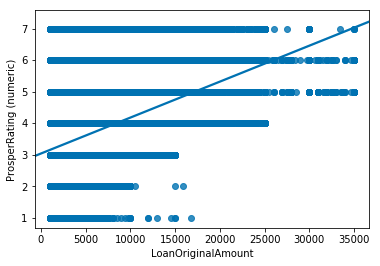

In [35]:
# Loan Original Amount Variation for each Prosper Rating (numeric) Category
sns.regplot(x='LoanOriginalAmount', y='ProsperRating (numeric)', data=loan_df);

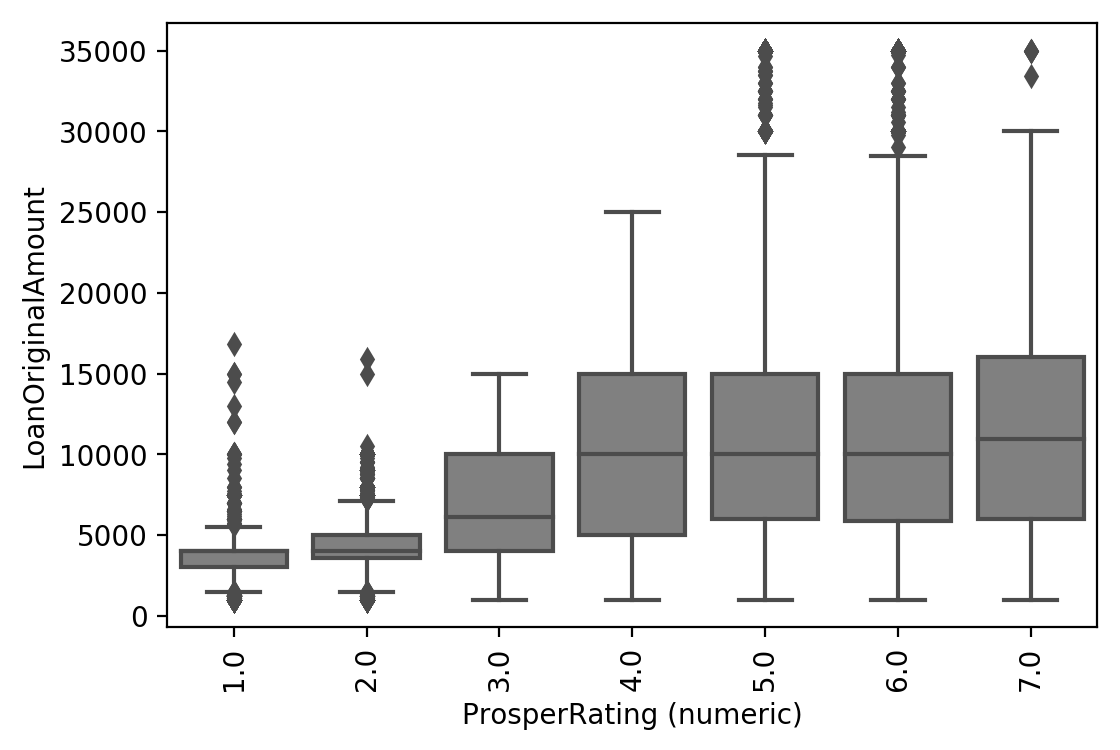

In [36]:
# Loan Original Amount variation for each ProsperRating (numeric) category
fig7,axes=plt.subplots(nrows=1,ncols=1,dpi=200)

sns.boxplot(data=loan_df, x='ProsperRating (numeric)', y='LoanOriginalAmount', color='0.5')
plt.xticks(rotation=90);

**Prosper Rating (numeric) and Loan Original Amount Relationship:**

    1. Loan Original Amount is related to ProsperRating (numeric).
    2. The Lower Prosper Rating (numeric) are Associated with Lower Loan Original Amount.
    3. There seem to be 3 Distinct Groups among the Data based on above Plot:
        **A. Prosper Rating (numeric) of 1 and 2:** These have the Lowest Loan Original Amount, than is less than 5,000.
        **B. Prosper Rating (numeric) of 3:** This Group has a Medium Loan Original Amount of about 6,000.
        **C. Prosper Rating (numeric) of Bigger than 3:** This Group Recevied Loan Original Amount of More than 10,000.

**Part III: Multivariate Exploration**

So far, we looked at various univariate and bivariate relationships.

In the following section, we will look into a few multivariate plots, trying extract more information from our dataset.

We start our work by using pairplots to plot ['BorrowerAPR','LoanOriginalAmount'] vs ['Investors', 'LP_InterestandFees','EmploymentStatusDuration', 'InvestmentFromFriendsAmount', 'ProsperRating (numeric)', 'EmploymentStatusDuration', 'AvailableBankcardCredit', 'RevolvingCreditBalance'] using different categorical columns as classifier. This will help us better see the overal relationships and trends and pick a few of them for further studies.

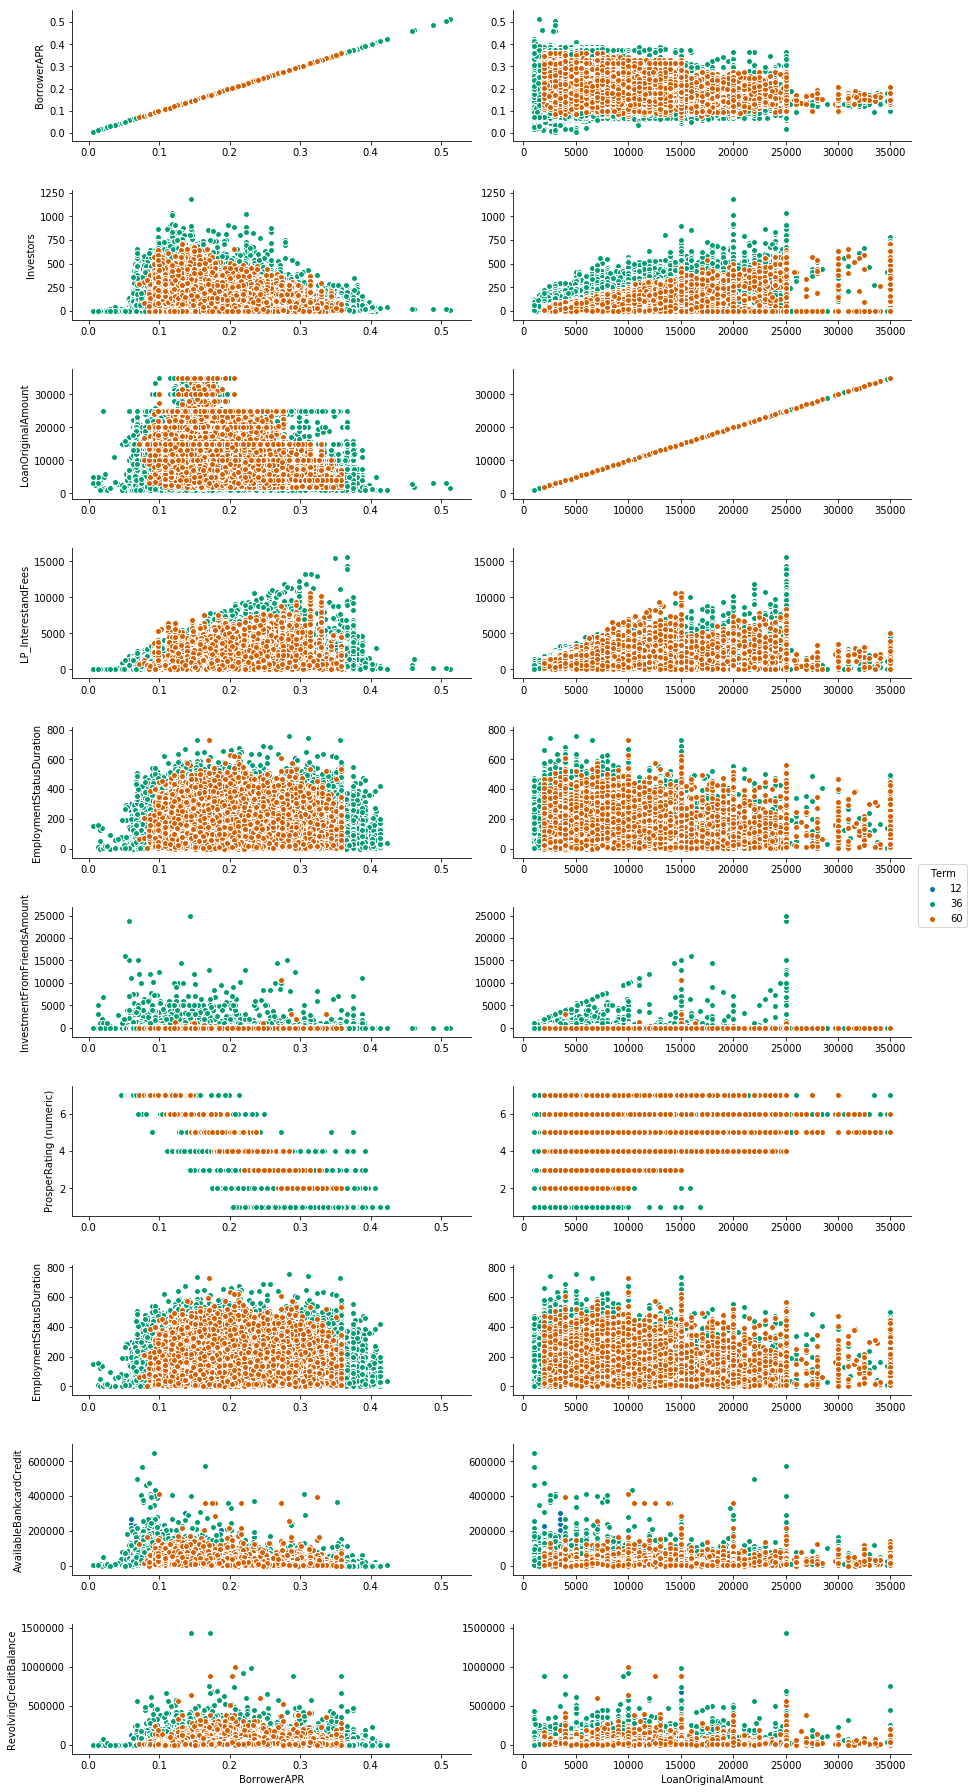

In [37]:
sns.pairplot(loan_df, x_vars = ['BorrowerAPR','LoanOriginalAmount'] , 
             y_vars = ['BorrowerAPR','Investors','LoanOriginalAmount','LP_InterestandFees',
                       'EmploymentStatusDuration','InvestmentFromFriendsAmount','ProsperRating (numeric)',
                       'EmploymentStatusDuration', 'AvailableBankcardCredit', 'RevolvingCreditBalance'],
            hue = 'Term', aspect= 2.5, palette='colorblind');

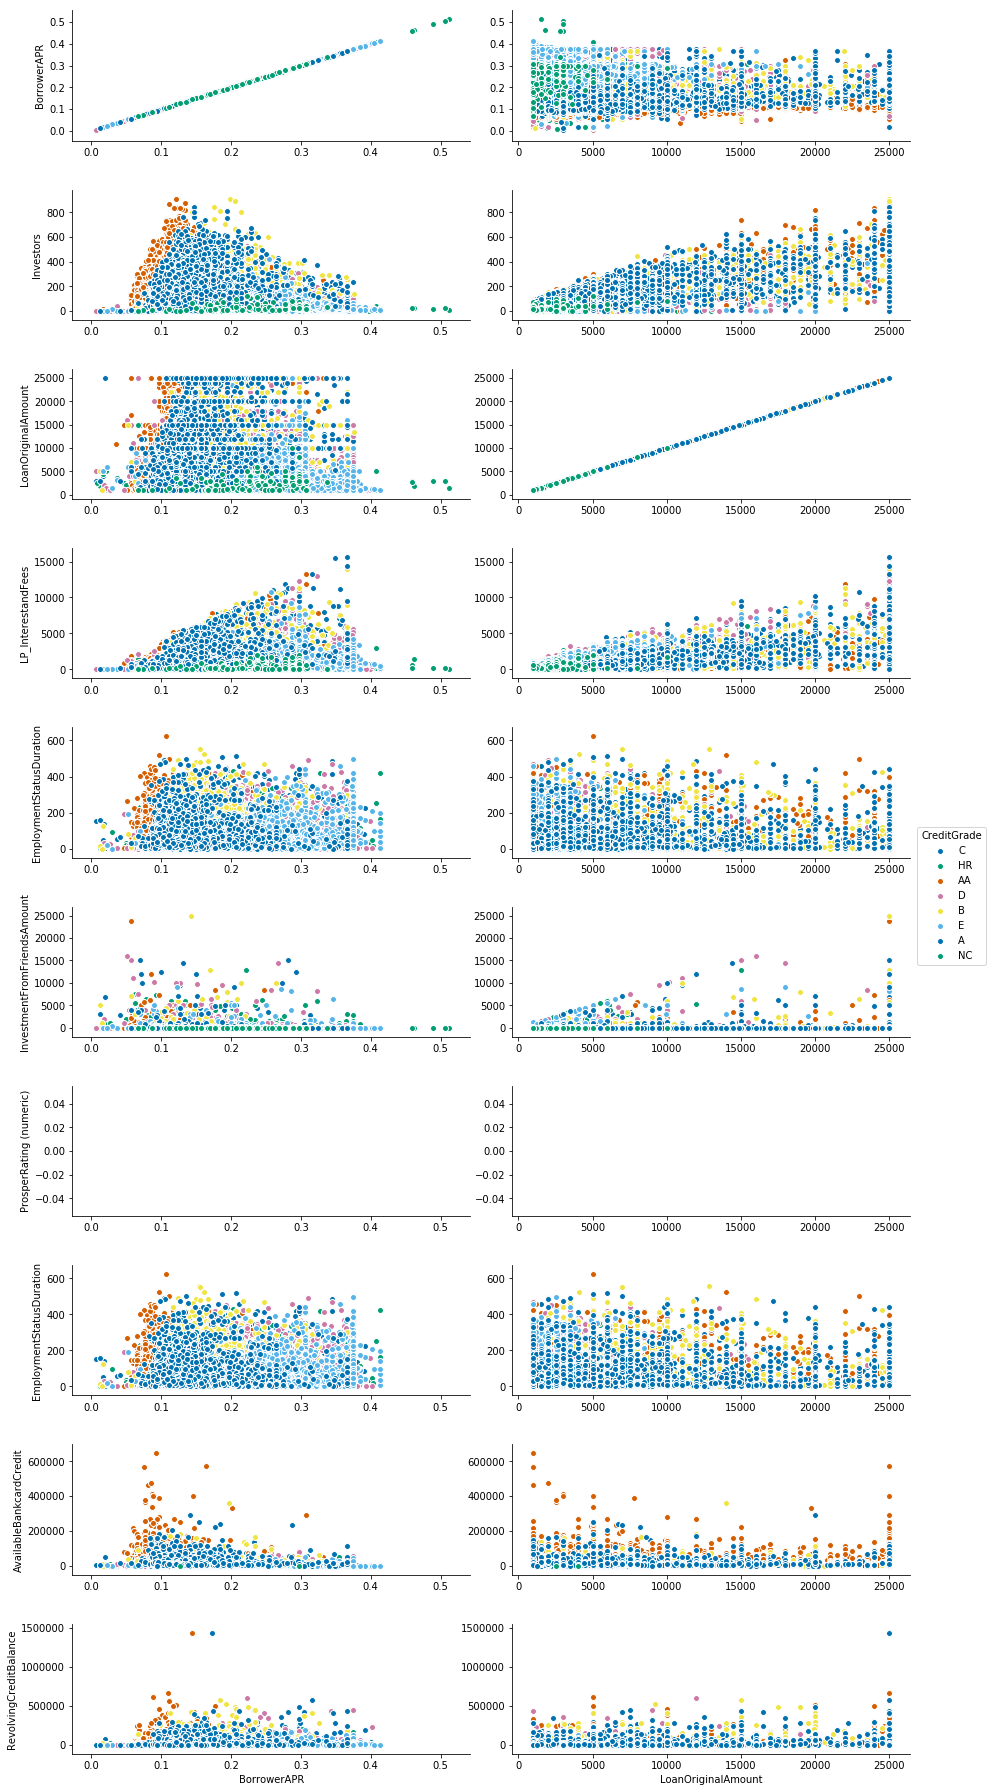

In [38]:
sns.pairplot(loan_df, x_vars = ['BorrowerAPR','LoanOriginalAmount'] , 
             y_vars = ['BorrowerAPR','Investors','LoanOriginalAmount','LP_InterestandFees',
                       'EmploymentStatusDuration','InvestmentFromFriendsAmount','ProsperRating (numeric)',
                       'EmploymentStatusDuration', 'AvailableBankcardCredit', 'RevolvingCreditBalance'],
            hue = 'CreditGrade', aspect= 2.5, palette='colorblind');

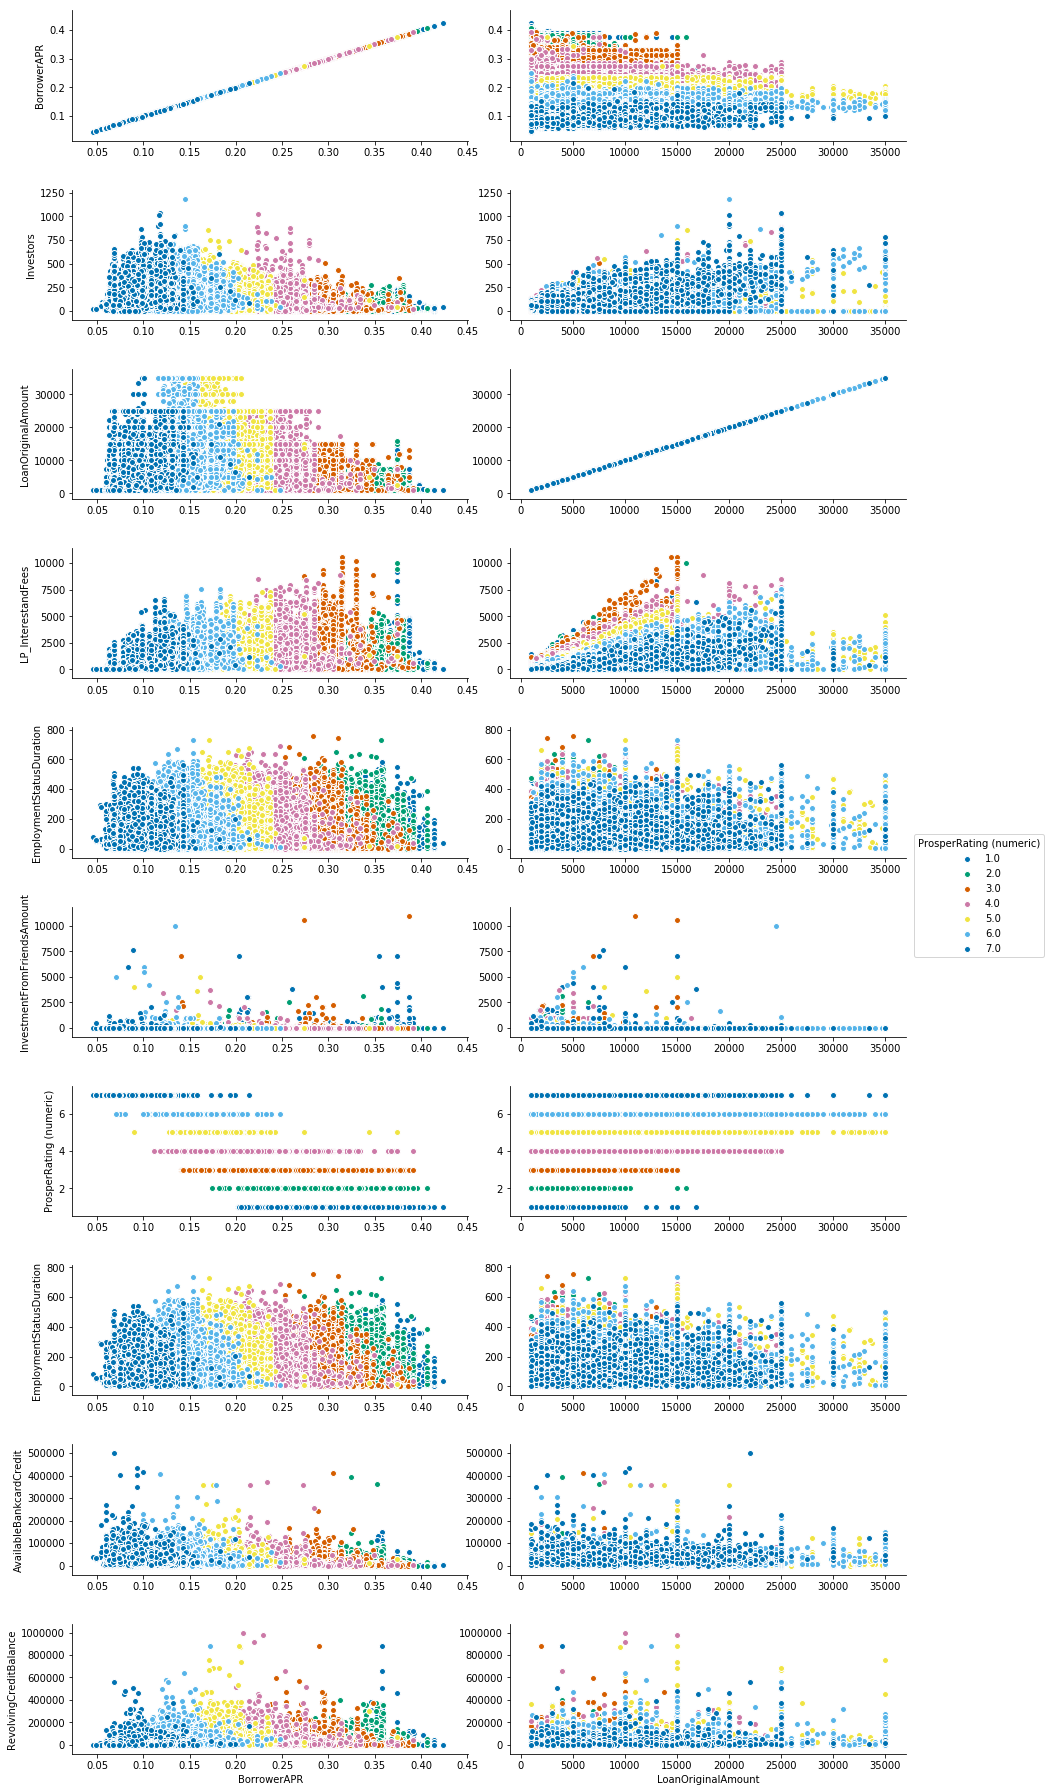

In [39]:
sns.pairplot(loan_df, x_vars = ['BorrowerAPR','LoanOriginalAmount'] , 
             y_vars = ['BorrowerAPR','Investors','LoanOriginalAmount','LP_InterestandFees',
                       'EmploymentStatusDuration','InvestmentFromFriendsAmount','ProsperRating (numeric)',
                       'EmploymentStatusDuration', 'AvailableBankcardCredit', 'RevolvingCreditBalance'],
            hue = 'ProsperRating (numeric)', aspect= 2.5, palette='colorblind');

**Findings:**

1. From our Experiments with Pairplots, we have learned that there are Trends and Relationships between some of the Plots.
2. Especially when using Credit Grade or Prosper Rating (numeric) as classifier.

Below we will focus on Borrower APR Versus Available Bank Card Credit for Best and Worst Credit Grades.

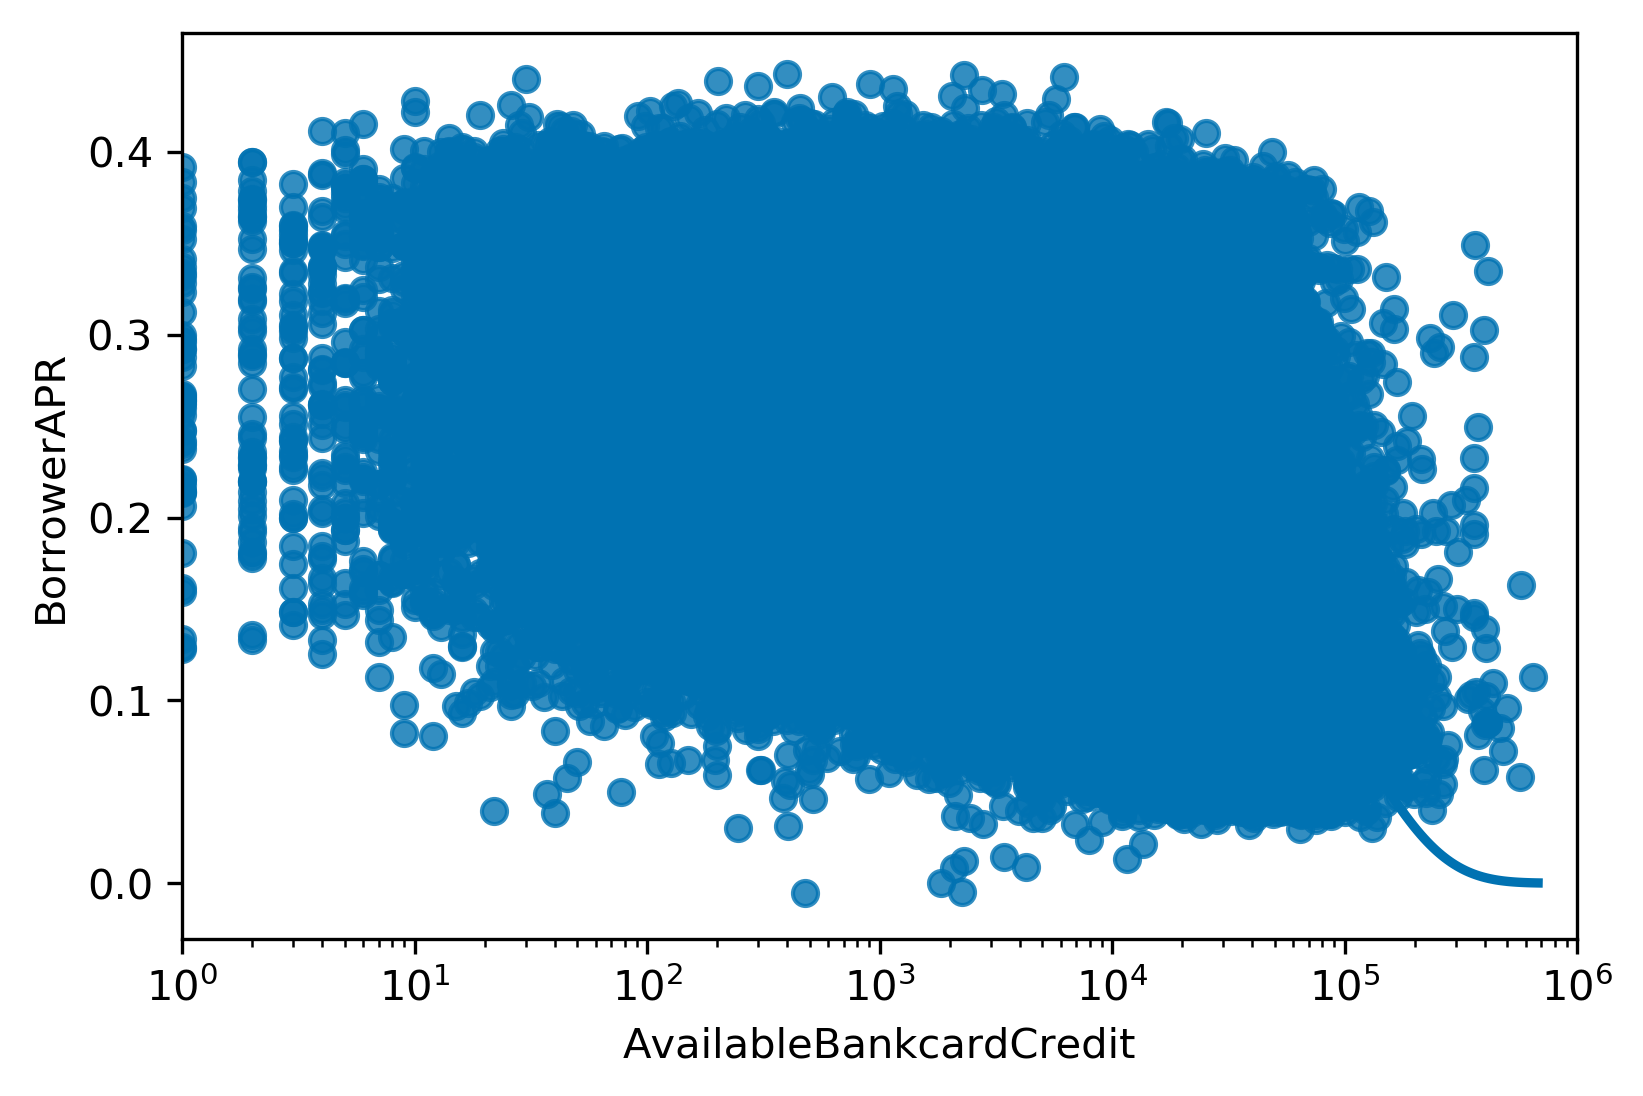

In [45]:
# Lets check the best and worst credit grades: Is there any trend?
# First: using a mask we filter only the following credit grades: ['AA','HR','D','E']
# Then we plot a scatter plot of BorroerAPR vs AvailableBankCredit, colorcoded by CreditGrade
mask = loan_df['CreditGrade'].isin(['AA','E','D'])
loan_df.loc[mask,('BorrowerAPR','AvailableBankcardCredit','CreditGrade')]

# Scatter plot of BorrowerAPR versus AvailableBankcardCredit for best and worst CreditGrades
# we will use a random sampling to lower the density of data and observe the trends more effectively
fig8,axes=plt.subplots(nrows=1,ncols=1,dpi=300)
sns.regplot(y='BorrowerAPR', x='AvailableBankcardCredit', data=loan_df, 
           logistic=True, n_boot=500, y_jitter=.03)

plt.xscale('log')
plt.xlim(1, 1000000);

**Borrower APR Versus Available Bank Card Credit for Best and Worst Credit Grades:**

1. There is a very Large Variation in the Borrower APR Versus Available Bank Card Credit. Using the Logarithmic Scale and Categorising based off Credit Grade, creates More Insight into the data.
2. Although there are overlaps, we can see that similar CreditGrades are clustered near each other.
3. Most importantly, we can see that D and E categories are leaning toward the upper left of the chart, having higher BorrowerAPR while better CreditGrade of AA occupies the bottom right corner of the chart which is associated with the lowest possible BorrowerAPR

In [46]:
# Creating a Pivot Table to Analyse Multiple Variables with a HeatMap
# This Pivot Table shows the Average Borrower APR for Different Categories of Prosper Rating(numeric) Versus Employment Status 

pivot_table=loan_df.pivot_table(values='BorrowerAPR',index='EmploymentStatus',
                                columns='ProsperRating (numeric)')
pivot_table

ProsperRating (numeric)       1.0       2.0       3.0       4.0       5.0  \
EmploymentStatus                                                            
Employed                 0.356704  0.328767  0.279917  0.225855  0.184561   
Full-time                0.354274  0.343035  0.285567  0.229962  0.176361   
Not employed             0.355192  0.342540  0.295956  0.250451  0.198343   
Other                    0.356180  0.326583  0.275895  0.226814  0.184360   
Part-time                0.360652  0.339804  0.281258  0.225392  0.168737   
Retired                  0.353917  0.353557  0.286706  0.232628  0.177576   
Self-employed            0.354106  0.331786  0.281131  0.222380  0.180615   

ProsperRating (numeric)       6.0       7.0  
EmploymentStatus                             
Employed                 0.140456  0.090363  
Full-time                0.128444  0.088291  
Not employed             0.147728  0.118158  
Other                    0.142104  0.090502  
Part-time                0.124777  0.088034  
Retired                  0.126503  0.091379  
Self-employed            0.138788  0.089877

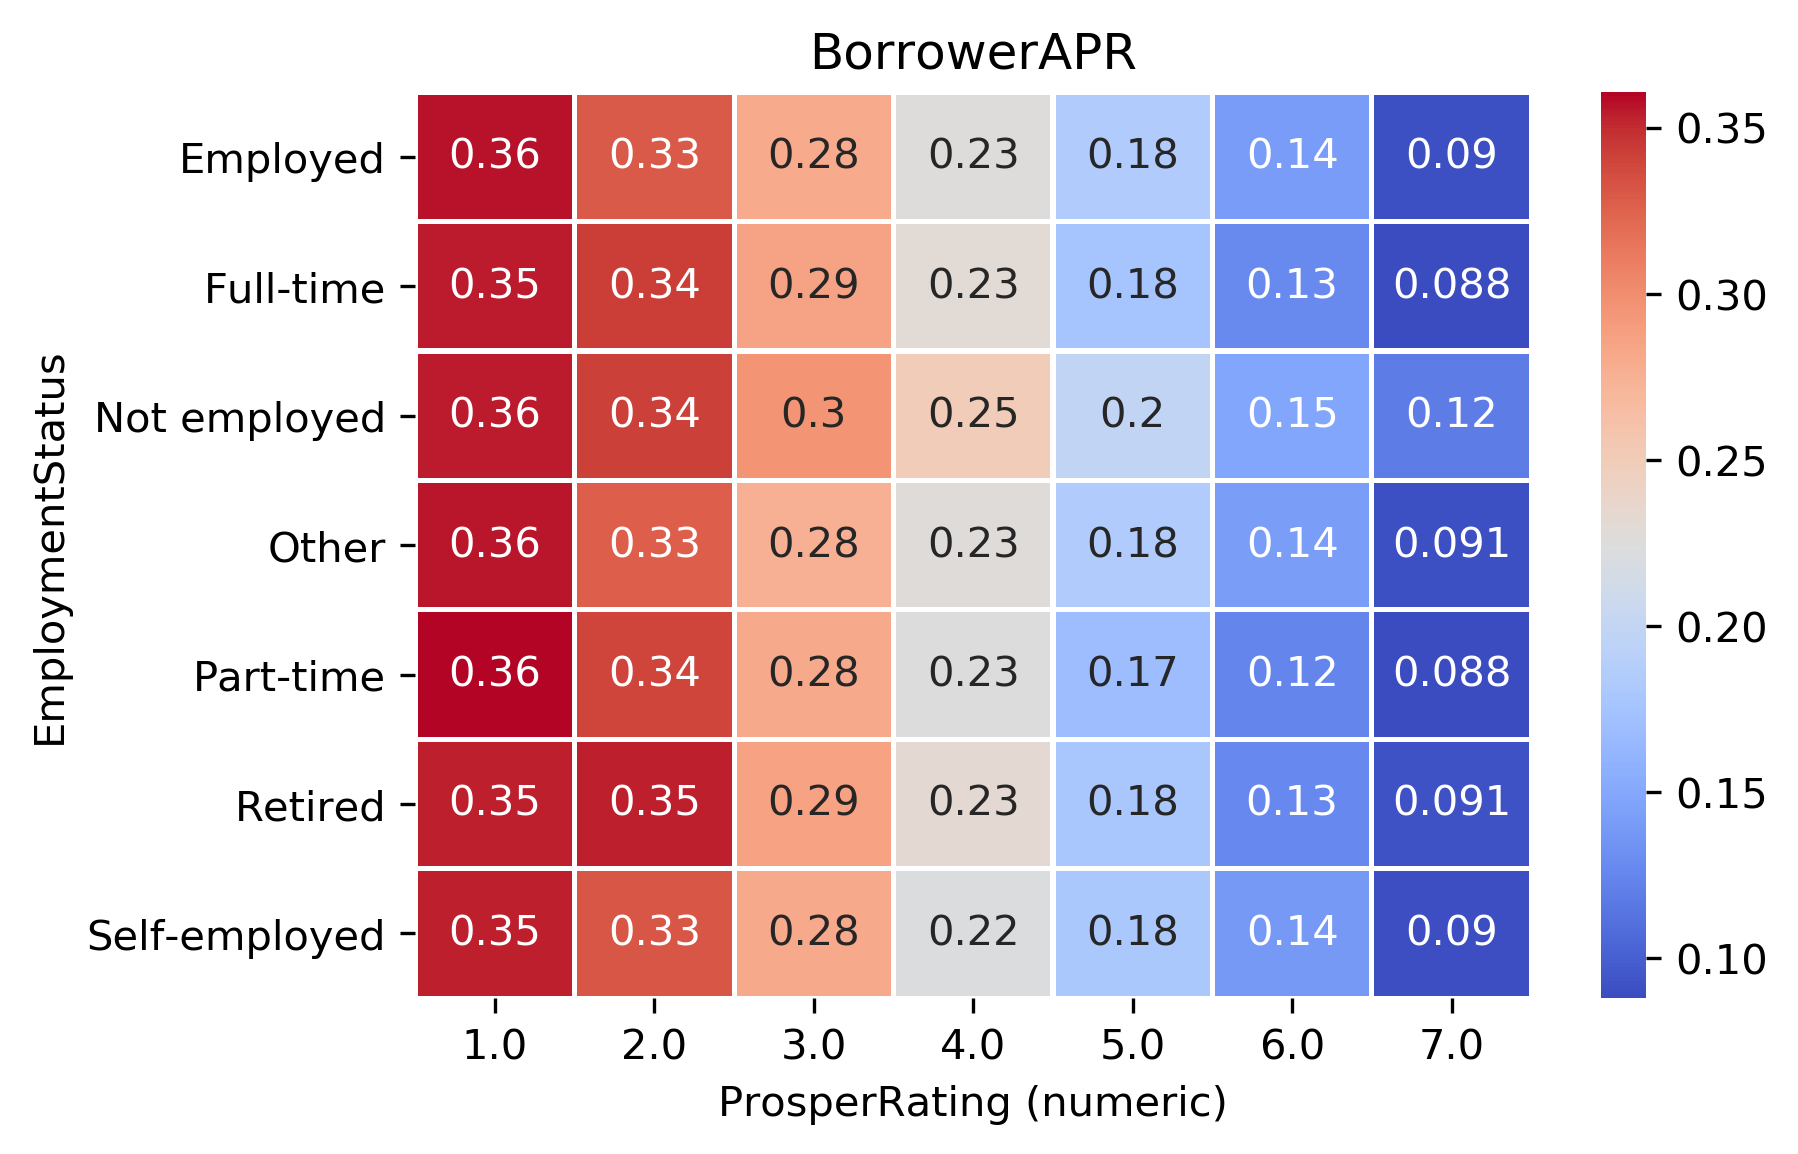

In [47]:
# Heatmap from the pivot table
fig9,axes=plt.subplots(nrows=1,ncols=1,dpi=300)
sns.heatmap(pivot_table,cmap='coolwarm'
            ,linecolor='white',linewidths=1, annot=True);
plt.title('''BorrowerAPR''');

**Learning from Multivariate Heatmap:**

1. There is a General Trend from Left to Right of the HeatMap, Inceases Values of Borrower APR by Decreasing Prosper Rating (numeric).
2. There is no Huge Vertical Variation of Values Inside each Prosper Rating (numeric) Category, Not Employed Group stands out by showing a commonly Higher Borrower APR than other Employment Status.

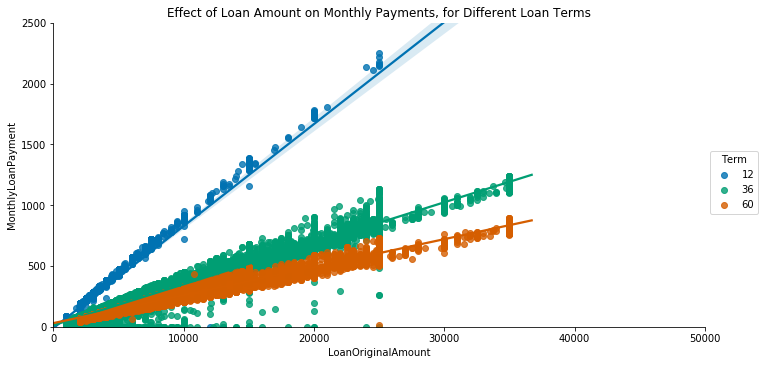

In [48]:
# Scatter plot of Loan Amount on Monthly Payments,for different loan Terms
sns.lmplot(y='MonthlyLoanPayment',x='LoanOriginalAmount',data=loan_df, 
           hue = 'Term', palette='colorblind'
           ,aspect=2);
plt.ylim(0,2500)
plt.xlim(0,50000)
plt.title('''Effect of Loan Amount on Monthly Payments, for Different Loan Terms''');

**Monthly Loan Payment Versus Loan Original Amount Scatter Plot, Categorized by Term:**

1. There is a Strong Positive Linear Relationship between Loan Original Amount and Monthly Loan Payment for each Different Term Category.
2. As expected, Higher Loan Original Amount Increases the Monthly Loan Payment.
3. The Shorter is the Term of Loan, the Higher becomes the Monthly Loan Payment.

# Summary and Conclusion

Next Few Slides will show what we learned from each plot. Conclusion is presented in 3 categories:

    Univariate
    Bivariate
    Multivariate

We have learned a great deal from plotting the data. Here are some major outcomes:

# What we Learned from Unvariant Visual Data Exploration

**Loan Status** Count Plot:

1. Data is Unimodal around Category. Basically, Current Category Contains More Loans than any others.
2. Almost all the data can be placed in the First Four Categories Current, Completed, Chargedoff, Defaulted BorrowerRate Histogram and Box Plots.
3. All Borrower APR values Larger than 0.45 can be considered as Outliers, based on the BoxPlot.
4. Mean and Median are very close to each other, Mean is Slightly Larger than Median.
5. It is a Slightly Right Skewed Distribution with a Spike around 0.35 Loan Original Amount Histogram and Box PLot.
6. All values Larger than 25,000 can be considered as Outliers, based on the BoxChart.
7. Mean and Median are quite different, Mean is considerably Larger than Median, indicating Positive Skewness.
8. Data shows Positively Skewed Distribution with Majority of Data Points falling between 1,000 and 10,000.
9. Based on the Logarithmic View, data is quite spiky and it is very hard to call it as Unimodal or even Bimodal.

# What we Learned from Bivariant Visual Data Exploration

**Borrower APR for Loan Status Categories**

1. Mean values of BrrowerAPR for Current and Completed LoanStatus categories are significantly lower than Chargedoff and Defaulted categories.
2. This suggests that peaple with higher BorrowAPR rate has a higher chance of defaulting or being charged off. This may be due to their higgher interest payyment or the fact thatt they had originally lower credit score indicating poor financial stregnth.

**BorrowerAPR vs. BorrowerRate**

1. Borrower APR is related to Borrower Rate.Pearson r of 0.99 is indicative of this fact.
2. There is a Strong Positive Relationship between the 2 Variables. This means when the Borrower APR Increases Borrower Rate will also increase.

**Borrower APR vs. Prosper Rating (Numeric)**

1. Borrower APR is related to Prosper Rating (Numeric).
2. There is a Negative Relationship between the 2 Variables. It means when the Prosper Rating (Numeric) variable Increases, the Borrower APR Decreases.

# What we Learned from Bivariant Visual Data Exploration(Continued):

**ProsperRating (Numeric) and Loan Original Amount Relationship**

1. Loan Original Amount is related to Prosper Rating (Numeric).
2. The Lower Prosper Rating (Numeric) are associated with Lower Loan Original Amount.
3. There seem to be 3 Distinct Groups among the Data based on above plot:
4. Prosper Rating (Numeric) of 1 and 2: these have the Lowest Loan Original Amount, which is Less than 5,000.
5. Prosper Rating (Numeric) of 3: this Group has a Medium Loan Original Amount of about 6,000.
6. Prosper Rating (Numeric) of Bigger than 3: this Group received Loan Original Amount of More than 10,000.

# What we Learned from Multivariant Visual Data Exploration

**Borrower APR versus Available Bank card Credit for Different Credit Grades**

1. There is a very Large Variation in the Borrower APR Versus Available Bank Card Credit. Using the Logarithmic Scale and Categorising based off Credit Grade , creates More Insight into the data.
2. Although there are Overlaps, we can see that Similar Credit Grades are Clustered Near Each Other.
3. Most Importantly, we can see that D and E Categories are Leaning toward the Upper Left of the Chart, having Higher Borrower APR while better Credit Grade of AA Occupies the Bottom Right Corner of the Chart which is associated with the Lowest possible Borrower APR.

**Multivariate Heatmap**

1. There is a General Trend from Left to Right of the HeatMap, Increasing Values of Borrower APR by Decreasing Prosper Rating (Numeric).
3. There is no Huge Vertical Variation of Values Inside each Prosper Rating (Numeric) Category, Not Employed Group Stands out by showing a Commonly Higher Borrower APR than other Employment Status.

# What we Learned from Multivariant Visual Data Exploration(Continued):

**Monthly Loan Payment Versus Loan Original Amount Scatter Plot, Categorized by Term**

1. There is a Strong Positive Linear Relationship between Loan Original Amount and Monthly Loan Payment for each Different Term Category.
2. As expected, Higher Loan Original Amount Increases the Monthly Loan Payment.
3. The Shorter is the term of Loan, the Higher becomes the Monthly Loan Payment.

In [49]:
loan_df.LoanOriginalAmount

0          9425
1         10000
2          3001
3         10000
4         15000
5         15000
6          3000
7         10000
8         10000
9         10000
10        13500
11         1000
12         4000
13         8500
14        19330
15         4000
16         4000
17        10000
18        15000
19         6500
20        14000
21         3000
22         4000
23         2000
24         4000
25         4000
26         4000
27         4000
28        10000
29        35000
          ...  
113906     3001
113907     4000
113908     7500
113909     6000
113910     4000
113911    10000
113912     4000
113913     8000
113914     3000
113915     3000
113916     4000
113917     4000
113918     7000
113919     4000
113920     4000
113922     5000
113923     8000
113924     5000
113925     4000
113926     3000
113927     4292
113928     2000
113929     2500
113930     3000
113931    25000
113932    10000
113933     2000
113934    10000
113935    15000
113936     2000
Name: LoanOriginalAmount